<a href="https://colab.research.google.com/github/Shahahaha11/MyNewRepo/blob/main/Lion_den_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TESTING GEOGRAPHICALLY WEIGHTED REGRESSION . Fotheringham, Brunsdon & Charlton (2003)

In [1]:
import pandas as pd
import numpy as np
# Load the data
file_path= "/content/drive/MyDrive/austinHousingData.csv"
data = pd.read_csv(file_path)

data.shape

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/austinHousingData.csv'

In [2]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
###########################################################################################################################################################
############################################################### DATA EXPLORATION ##########################################################################
###########################################################################################################################################################

In [ ]:
data['latest_saledate'].dtypes

dtype('O')

In [ ]:
data['latest_saledate'].isna().sum()

0

In [ ]:
                                      ########################### DATA CLEANING ###########################

In [ ]:

# Remove any leading or trailing whitespace
data['latest_saledate'] = data['latest_saledate'].str.strip()

# Convert to datetime by explicitly specifying the format (MM/DD/YYYY)
data['latest_saledate'] = pd.to_datetime(data['latest_saledate'], format='%d/%m/%Y', errors='coerce')

# Check how many values are still missing
print(data['latest_saledate'].isna().sum())


0


In [ ]:
                                      ########################### DATA VISUALIZATION ###########################

In [ ]:
# Data inspection
print(f"integer:{data.select_dtypes(include='integer').columns}")
print(f"object:{data.select_dtypes(include='object').columns}")
print(f"bools:{data.select_dtypes(include='bool').columns}")

integer:Index(['zpid', 'zipcode', 'garageSpaces', 'parkingSpaces', 'yearBuilt',
       'latestPrice', 'numPriceChanges', 'latest_salemonth', 'latest_saleyear',
       'numOfPhotos', 'numOfAccessibilityFeatures', 'numOfAppliances',
       'numOfParkingFeatures', 'numOfPatioAndPorchFeatures',
       'numOfSecurityFeatures', 'numOfWaterfrontFeatures',
       'numOfWindowFeatures', 'numOfCommunityFeatures', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolSize', 'MedianStudentsPerTeacher',
       'numOfBedrooms', 'numOfStories'],
      dtype='object')
object:Index(['city', 'streetAddress', 'description', 'homeType', 'latestPriceSource',
       'homeImage'],
      dtype='object')
bools:Index(['hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView'],
      dtype='object')


In [ ]:
 # We have 958 days of analysis
 data['latest_saledate'].value_counts().sort_index()

,count
latest_saledate,
2018-01-22,4
2018-01-23,10
2018-01-24,8
2018-01-25,11
2018-01-26,13
...,...
2021-01-26,2
2021-01-27,2
2021-01-28,1


In [ ]:
################################################################## OPERATING DATA ############################################################################
df= data[data['city'] == 'austin'].sort_values(by='latest_saledate')
df.select_dtypes(include='integer').columns

Index(['zpid', 'zipcode', 'garageSpaces', 'parkingSpaces', 'yearBuilt',
       'latestPrice', 'numPriceChanges', 'latest_salemonth', 'latest_saleyear',
       'numOfPhotos', 'numOfAccessibilityFeatures', 'numOfAppliances',
       'numOfParkingFeatures', 'numOfPatioAndPorchFeatures',
       'numOfSecurityFeatures', 'numOfWaterfrontFeatures',
       'numOfWindowFeatures', 'numOfCommunityFeatures', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolSize', 'MedianStudentsPerTeacher',
       'numOfBedrooms', 'numOfStories'],
      dtype='object')

In [ ]:
df['latest_saledate']

,latest_saledate
10422,2018-01-22
2014,2018-01-22
840,2018-01-22
2721,2018-01-22
9767,2018-01-23
...,...
15168,2021-01-27
14817,2021-01-28
14122,2021-01-29
14819,2021-01-29


In [ ]:
df.select_dtypes(include= 'object').columns

Index(['city', 'streetAddress', 'description', 'homeType', 'latestPriceSource',
       'homeImage'],
      dtype='object')

In [ ]:
object_features = ['city', 'streetAddress', 'description', 'homeType', 'latestPriceSource','homeImage']

In [ ]:
#USELESS FEATURES
useless_features= ['zipcode','zpid', 'city', 'streetAddress', 'zipcode', 'description','homeImage','homeType', 'latestPriceSource']

In [ ]:
df.select_dtypes(include='object').columns

Index(['city', 'streetAddress', 'description', 'homeType', 'latestPriceSource',
       'homeImage'],
      dtype='object')

In [ ]:
######################################################################### FINAL DATAFRAME IN USE ##########################################################################################
df_1 = df.drop(columns=useless_features, errors='ignore')
df_1.shape

(15020, 39)

In [ ]:
df_1.isna().sum()

In [ ]:
"""df_1 = df_1.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)
df_1 = df_1.apply(pd.to_numeric, errors='coerce')
"""

"df_1 = df_1.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)\ndf_1 = df_1.apply(pd.to_numeric, errors='coerce')\n"

In [ ]:
# Get Mortgage rate
import pandas as pd
MTG = pd.read_csv('/content/drive/MyDrive/MORTGAGE30US.csv')

print(MTG.shape)

MPPSQ = pd.read_csv('/content/drive/MyDrive/MEDLISPRIPERSQUFEE12420.csv')
print(MPPSQ.dtypes)

(160, 2)
observation_date           object
MEDLISPRIPERSQUFEE12420     int64
dtype: object


In [ ]:
############################################################################### Tranforming Mortgage Data #############################################################################################

In [ ]:
def parse_obs_date(date_str):
    # Convert to string, remove whitespace and drop any time part
    d = str(date_str).strip().split()[0]
    # If the date contains "/", assume DD/MM/YYYY format; otherwise, let pandas infer (e.g. ISO)
    if "/" in d:
        return pd.to_datetime(d, format='%d/%m/%Y', errors='raise')
    else:
        return pd.to_datetime(d, errors='raise')

MTG['observation_date'] = MTG['observation_date'].apply(parse_obs_date)
MPPSQ['observation_date'] = MPPSQ['observation_date'].apply(parse_obs_date)
MTG['MORTGAGE30US'].dtypes

dtype('float64')

In [ ]:
print(MTG.isna().sum())
print(MPPSQ.isna().sum())

observation_date    0
MORTGAGE30US        0
dtype: int64
observation_date           0
MEDLISPRIPERSQUFEE12420    0
dtype: int64


In [ ]:
df_2 = df_1.copy()

In [ ]:
###############################################################################################.MERGE. ################################################################################################


import pandas as pd

# Convert and sort the main DataFrame by latest_saledate
df_2['latest_saledate'] = pd.to_datetime(df_2['latest_saledate'], errors='coerce')
df_2 = df_2.sort_values('latest_saledate')

# Read and prepare the MTG rates df_2
MTG['observation_date'] = pd.to_datetime(MTG['observation_date'], format='%d/%m/%Y', errors='coerce')
MTG = MTG.sort_values('observation_date')

# Merge using asof so that each sale date gets the most recent MTG rate available
df_2 = pd.merge_asof(df_2, MTG, left_on='latest_saledate', right_on='observation_date', direction='backward')

# Optional: Remove the duplicate 'date' column if no longer need it
df_2.drop(columns=['observation_date'], inplace=True)
df_2.columns

Index(['latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'numOfPhotos', 'numOfAccessibilityFeatures',
       'numOfAppliances', 'numOfParkingFeatures', 'numOfPatioAndPorchFeatures',
       'numOfSecurityFeatures', 'numOfWaterfrontFeatures',
       'numOfWindowFeatures', 'numOfCommunityFeatures', 'lotSizeSqFt',
       'livingAreaSqFt', 'numOfPrimarySchools', 'numOfElementarySchools',
       'numOfMiddleSchools', 'numOfHighSchools', 'avgSchoolDistance',
       'avgSchoolRating', 'avgSchoolSize', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'MORTGAGE30US'],
      dtype='object')

In [ ]:
# Read and prepare the MPPSQ for df_2
MPPSQ['observation_date'] = pd.to_datetime(MPPSQ['observation_date'], format='%d/%m/%Y', errors='coerce')
MPPSQ = MPPSQ.sort_values('observation_date')

# Merge using asof so that each sale date gets the most recent MPPSQ available
df_2 = pd.merge_asof(df_2, MPPSQ, left_on='latest_saledate', right_on='observation_date', direction='backward')

# Optional: Remove the duplicate 'date' column if you no longer need it
df_2.drop(columns=['observation_date'], inplace=True)
df_2.columns

Index(['latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'numOfPhotos', 'numOfAccessibilityFeatures',
       'numOfAppliances', 'numOfParkingFeatures', 'numOfPatioAndPorchFeatures',
       'numOfSecurityFeatures', 'numOfWaterfrontFeatures',
       'numOfWindowFeatures', 'numOfCommunityFeatures', 'lotSizeSqFt',
       'livingAreaSqFt', 'numOfPrimarySchools', 'numOfElementarySchools',
       'numOfMiddleSchools', 'numOfHighSchools', 'avgSchoolDistance',
       'avgSchoolRating', 'avgSchoolSize', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'MORTGAGE30US',
       'MEDLISPRIPERSQUFEE12420'],
      dtype='object')

In [ ]:
df_2[['latest_saledate','MORTGAGE30US','MEDLISPRIPERSQUFEE12420']]

,latest_saledate,MORTGAGE30US,MEDLISPRIPERSQUFEE12420
0,2018-01-22,4.04,163
1,2018-01-22,4.04,163
2,2018-01-22,4.04,163
3,2018-01-22,4.04,163
4,2018-01-23,4.04,163
...,...,...,...
15015,2021-01-27,2.77,226
15016,2021-01-28,2.73,226
15017,2021-01-29,2.73,226
15018,2021-01-29,2.73,226


In [ ]:
# Assuming df_2 is already sorted by date
n_train = int(0.8 * len(df_2))
train = df_2.iloc[:n_train]
test  = df_2.iloc[n_train:]

X_train = train.drop(columns=['latestPrice'])
y_train = train['latestPrice']
X_test = test.drop(columns=['latestPrice'])
y_test = test['latestPrice']
X_train.shape


(12016, 40)

In [ ]:
print(X_train.select_dtypes(exclude=['object']).columns)
print(X_train.dtypes)

Index(['latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView', 'parkingSpaces', 'yearBuilt', 'numPriceChanges',
       'latest_saledate', 'latest_salemonth', 'latest_saleyear', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'MORTGAGE30US',
       'MEDLISPRIPERSQUFEE12420'],
      dtype='object')
latitude                             float64
longitude                            float64
propertyTaxRate            

In [ ]:
############################################################################ GEOGRAPHICALLY WEIGHTED REGRESSION #######################################################################################

## Geographically Weighted Regression (GWR) With Mathematical Formula
### **Methodology**

This model estimates the parameters of a regression model locally, allowing for spatial variation in relationships between the explanatory variables and the dependent variable. It accounts for spatial heterogeneity by giving more weight to nearby observations when estimating regression coefficients.


 1. **Data Preparation:**
   - `X_train`: The input features for the regression model (excluding latitude and longitude).
   - `y_train`: The dependent variable (target).
   - `coords`: Latitude and longitude values of the observations.

2. **Gaussian Kernel Function:**
   - A Gaussian kernel function is used to assign a weight to each data point based on its distance from a target observation.
   - The kernel function is defined as:

   $$
   W(i, j) = \exp\left(\frac{-0.5 \cdot d_{ij}^2}{\sigma^2}\right)
   $$
where $( d_{ij} )$ is the distance between observations \( i \) and \( j \), and $σ$ (bandwidth) controls the range of influence.


3. **Bandwidth and Neighbor Selection:**
   - The `bandwidth` parameter controls the spread of the kernel function, influencing how far the neighbors' data points affect the local regression.
   - The `k` parameter specifies the number of nearest neighbors considered for each local regression. The nearest neighbors are found using the `NearestNeighbors` algorithm from scikit-learn.

4. **Local Regression:**
   - For each observation \( i \), the model selects the `k` nearest neighbors (based on latitude and longitude) using the k-nearest neighbors (KNN) algorithm.
   - A weighted least squares regression is then performed using the Gaussian kernel weights. The local regression coefficients (betas) are computed by solving the weighted least squares problem:

   $$
   (X_k^T W_k X_k) \beta = X_k^T W_k y_k
   $$

   where:
   - \( X_k \) is the matrix of the features for the \( k \)-nearest neighbors,
   - \( W_k \) is the diagonal weight matrix based on distances,
   - \( y_k \) is the vector of target values for the \( k \)-nearest neighbors.

5. **Output:**
   - The `local_betas_1` array contains the local regression coefficients for each observation, capturing the spatial variation in the relationships between the dependent variable and the features.

### Notes:
- The model assumes that the relationship between the dependent and independent variables may vary by location (i.e., the coefficients can change across space).

- This implementation uses the k-nearest neighbors approach to weight observations, which allows for flexible and localized regression analysis.


In [ ]:
# GWR MATHEMATICAL : output -> local_betas_1
import numpy as np
import pandas as pd
import numpy.linalg as la
from sklearn.neighbors import NearestNeighbors

''' 1. DATA PREPARATION '''
# Ensure X_train contains **only numeric columns** excluding latitude & longitude
X_train_array = X_train.select_dtypes(include=['number']).drop(columns=['longitude', 'latitude'], errors='ignore').values

y_1 = y_train.values.reshape(-1, 1)  # Ensure y is (n,1)
coords = X_train[['latitude', 'longitude']].values  # shape (n,2)

'''2. GAUSSIAN KERNEL FUNCTION '''

def gaussian_kernel(distance, bandwidth):
    return np.exp(-0.5 * (distance ** 2) / (bandwidth ** 2))

'''3. BANDWIDTH AND NEIGHBOR SELECTION -> Pre-determined bandwidth and neighbors '''

bandwidth = 0.7
k = 500  # number of neighbors to use for local weighting
n, p = X_train_array.shape  # `p` excludes lat/lon

# Add intercept to X_train_array
X_train_aug_1 = np.hstack([np.ones((n, 1)), X_train_array])  # Shape (n, p+1)

# Precompute k-nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(coords)
distances, indices = nbrs.kneighbors(coords)

''' 4. LOCAL REGRESSION '''
local_betas = []

for i in range(n):
    # Indices of k-nearest neighbors of i
    knn_idx = indices[i]
    # Distances to k-nearest neighbors
    di = distances[i]

    # Compute local weights
    wi = gaussian_kernel(di, bandwidth)
    W_k = np.diag(wi)  # Shape (k, k)

    # Subset X and y to these neighbors
    X_k = X_train_aug_1[knn_idx]  # Shape (k, p+1)
    y_k = y_1[knn_idx]            # Shape (k, 1)

    # Solve weighted least squares: (X_k^T W_k X_k) β = X_k^T W_k y_k
    XtW = X_k.T @ W_k
    beta_i, _, _, _ = np.linalg.lstsq(XtW @ X_k, XtW @ y_k, rcond=None)

    local_betas.append(beta_i.ravel())  # Store as 1D array

local_betas_1 = np.array(local_betas)  # Shape (n, p+1)
print("Local coefficients (betas) for each location:\n", local_betas_1)


Local coefficients (betas) for each location:
 [[ 9.23160913e+00  1.82789941e+01 -3.37591586e+03 ... -3.70637285e+04
  -3.49004233e+03 -2.98650175e+02]
 [-9.81247438e+00 -1.94286580e+01  1.90734062e+03 ... -3.83980844e+04
  -1.11739415e+04  7.42490483e+01]
 [ 3.63241911e+01 -2.27667812e+03  1.32871013e+04 ... -2.84893031e+04
  -4.41537317e+04 -3.83000197e+03]
 ...
 [-5.42467829e+00 -1.07408265e+01 -8.74568256e+02 ... -2.11149745e+04
  -7.13869680e+03  9.15095375e+02]
 [-9.89672774e+00 -1.95955142e+01  5.05359885e+03 ... -7.59823033e+03
  -1.20183395e+04 -7.42917617e+02]
 [-1.24001519e+03  9.88014449e+02  5.90808200e+03 ... -4.87750466e+04
  -4.90419918e+04 -4.89196588e+03]]


In [ ]:
"""df_2 = df_2.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)  # Remove spaces
df_2 = df_2.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, forcing invalid values to NaN
df_2.dtypes"""

"df_2 = df_2.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)  # Remove spaces\ndf_2 = df_2.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, forcing invalid values to NaN\ndf_2.dtypes"

In [ ]:
pip install mgwr

In [ ]:
X_train.shape

(12016, 40)

In [ ]:
"""import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame of predictors used in GWR (drop problematic columns)
predictors = X_train.select_dtypes(include=['number']).drop(
    columns=['latitude', 'longitude', 'MORTGAGE30US', 'MEDLISPRIPERSQUFEE12420', 'latest_saledate'],
    errors='ignore'
)

# Print correlation matrix
print("Correlation Matrix:")
print(predictors.corr())

# Add a constant term for VIF calculation
predictors_const = sm.add_constant(predictors)

# Calculate VIF for each variable
vif_data = pd.DataFrame({
    "Variable": predictors_const.columns,
    "VIF": [variance_inflation_factor(predictors_const.values, i) for i in range(predictors_const.shape[1])]
})
print("\nVariance Inflation Factors:")
print(vif_data)
"""

'import pandas as pd\nimport statsmodels.api as sm\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\n# Create a DataFrame of predictors used in GWR (drop problematic columns)\npredictors = X_train.select_dtypes(include=[\'number\']).drop(\n    columns=[\'latitude\', \'longitude\', \'MORTGAGE30US\', \'MEDLISPRIPERSQUFEE12420\', \'latest_saledate\'],\n    errors=\'ignore\'\n)\n\n# Print correlation matrix\nprint("Correlation Matrix:")\nprint(predictors.corr())\n\n# Add a constant term for VIF calculation\npredictors_const = sm.add_constant(predictors)\n\n# Calculate VIF for each variable\nvif_data = pd.DataFrame({\n    "Variable": predictors_const.columns,\n    "VIF": [variance_inflation_factor(predictors_const.values, i) for i in range(predictors_const.shape[1])]\n})\nprint("\nVariance Inflation Factors:")\nprint(vif_data)\n'


### Geographically Weighted Regression (GWR) using MGWR

## **Methodology**:
1. **Data Preparation**  
   - Selects numerical features, excluding collinear ones.  
   - Reshapes `y_train` to the required (n,1) format.  
   - Adds an intercept to the feature matrix.  

2. **Model Fitting**  
   - Uses a **fixed bandwidth** (manually set) or **auto-select bandwidth** based on AICc.   
   - Applies a **Gaussian kernel** to weight observations.  
   - Fits a GWR model using MGWR's `GWR` class.  

3. **Output**  
   - Computes **local regression coefficients (betas)** for each location.  
   - Stores coefficients in `local_betas` (shape: n × p).  



In [ ]:
# GWR USING MGWR: MAIN : output -> local_betas
import pandas as pd
import numpy as np
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW

# ------------------------------------------------------------------
''' 1) PREP DATA '''

# beta from GWR(features except  ) and then X_train_arra ( all features, except longitude and latitude )

# y_train is a Series of shape (n,).

coords = X_train[['latitude', 'longitude']].values

# X_ is same as X_train_array from math GWR

# dropping : garageSpaces and parkingSpaces are perfectly collinear (their correlation is 1 and their VIFs are infinite)
X_ = X_train.select_dtypes(include=['number']).drop(columns=['latitude', 'longitude', 'latest_saledate', 'parkingSpaces', 'MORTGAGE30US', 'MEDLISPRIPERSQUFEE12420'],
    errors='ignore'
).values
# mgwr requires y to be shape (n,1) not (n,)
# also y_ is same as y_1 from math GWR
y_ = y_train.values.reshape(-1, 1)

# mgwr also requires an intercept
X_gwr = np.hstack([np.ones((X_.shape[0], 1)), X_])

#--------------------------------------------------------------
""" 2) (OPTION A) MANUALLY SET A FIXED BANDWIDTH """

fixed_bw = 1

gwr_model = GWR(
    coords,       # (n, 2)
    y_,           # (n, 1)
    X_gwr,        # (n, p) [including intercept]
    bw=fixed_bw,
    kernel='gaussian',  # Gaussian kernel
    fixed=True,         # fixed distance bandwidth
    spherical=False
).fit()

local_betas = gwr_model.params  # shape (n, p)
print("Local betas shape:\n", local_betas.shape)


Local betas shape:
 (12016, 29)


When you run bw_selector.search(criterion='AICc'), mgwr tries multiple bandwidth values internally (some of which might be very small). For at least one of those bandwidth values, the local neighborhood around one or more observations becomes too small or too collinear, causing
 to be singular.

When you pick a fixed bandwidth manually (especially a larger one), the local neighborhoods may be large enough that none of them become singular, so you don’t see the error. But during the automatic search, mgwr tests different (often smaller) bandwidths, making some local regressions unsolvable and triggering the Matrix is singular error.

In [ ]:
###########################################################################################################################################################
############################################################### RANDOM FOREST #############################################################################
###########################################################################################################################################################

## Random Forest with Geographically Weighted Slopes

## **Overview**
This model trains a **Random Forest Regressor** on an **augmented feature matrix** that incorporates:  
- The original numerical features, from which we remove 'latitude'and 'longitude' (incorporated in GWR), 'latest_saledate' (time dependence factors are already extracted), 'parkingSpaces' ( for high collinearity with garage_spaces )  
- Local slopes extracted from a **Geographically Weighted Regression (GWR)** model  



## **Methodology**

### 1️. **Data Preparation**
- Select numerical features from the dataset, excluding non-relevant columns.
- Extract **local slopes** from GWR (`local_betas[:, 1:]`).
- Concatenate `X_rf` (filtered feature matrix) and `local_slopes` to create `X_aug`.

### 2️. **Model Training**
- Perform a **train-test split** (80% training, 20% validation).
- Train a **Random Forest Regressor** using default hyperparameters (`n_estimators=100`) and the second model with hyper parameter tuning.

### 3️. **Model Evaluation**
- Compute **R² (coefficient of determination)**.
- Calculate **RMSE (Root Mean Squared Error)**.



In [ ]:
################################################### Random Forest with Local Slopes #################################################
# MODEL 0 "USING local_betas"

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#################################################################### UPDATE ########################################################################
# We define X_rf using X_train by dropping specific columns.
# We removed from X_train the columns: 'latitude', 'longitude', 'latest_saledate', 'parkingSpaces'.
X_rf = X_train.select_dtypes(include=['number']).drop(
    columns=['latitude', 'longitude', 'latest_saledate', 'parkingSpaces'],
    errors='ignore'
).values
print("X_rf shape:", X_rf.shape)

# local_betas are obtained from the GWR model; its shape is (n, p).
local_betas = gwr_model.params
print("local_betas shape:", local_betas.shape)

# local_slopes are defined by dropping the intercept column (first column) from local_betas.
# This gives us an array of shape (n, p-1).
local_slopes = local_betas[:, 1:]

# Create the augmented feature matrix by horizontally stacking X_rf and local_slopes.
X_aug = np.hstack([X_rf, local_slopes])
print("Augmented feature shape:", X_aug.shape)

# Flatten the target y for ease of use (from shape (n,1) to (n,)).
y_array = y_.ravel()

# Chronological train-test split: first 80% as training, last 20% as validation.
n_total = X_aug.shape[0]
n_train = int(0.8 * n_total)

X_train_aug = X_aug[:n_train]
y_train_rf = y_array[:n_train]
X_valid_aug = X_aug[n_train:]
y_valid_rf = y_array[n_train:]

# Initialize the Random Forest model with fixed hyperparameters.
rf = RandomForestRegressor(
    n_estimators=100,
    max_features='sqrt',
    random_state=11,
    n_jobs=-1
)

# Fit the Random Forest model on the training data.
rf.fit(X_train_aug, y_train_rf)

# Predict on the validation set.
y_pred = rf.predict(X_valid_aug)

# Evaluate the model performance using R^2 and RMSE.
r2 = r2_score(y_valid_rf, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid_rf, y_pred))

print("Random Forest Performance:")
print(f"  R^2:  {r2:.3f}")
print(f"  RMSE: {rmse:,.3f}")


X_rf shape: (12016, 30)
local_betas shape: (12016, 29)
Augmented feature shape: (12016, 58)
Random Forest Performance:
  R^2:  0.708
  RMSE: 228,311.482


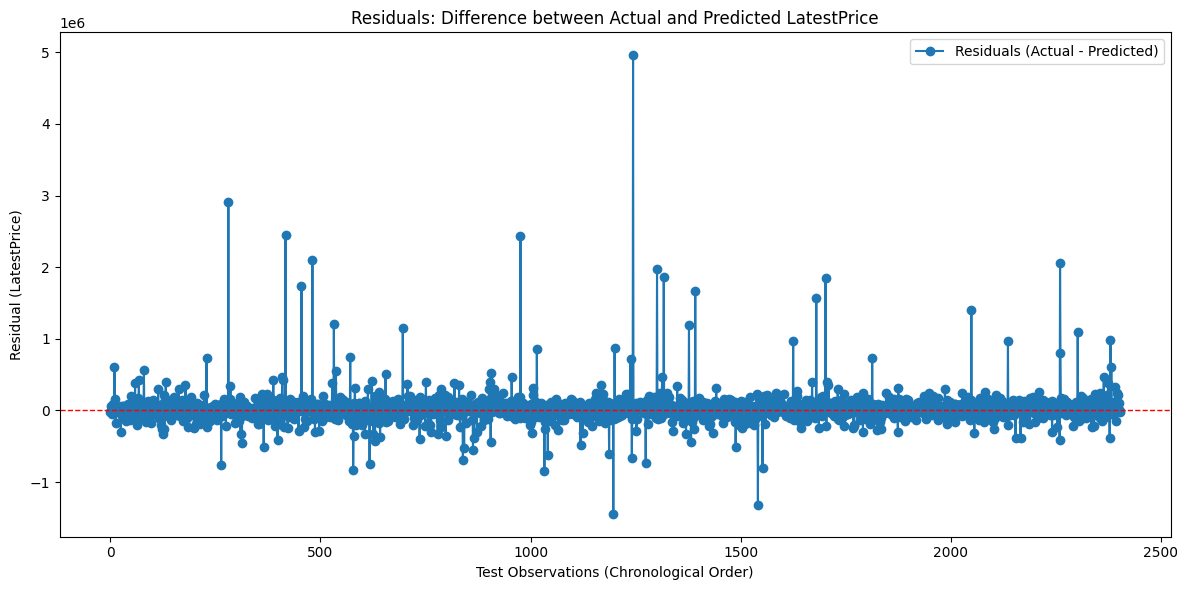

In [ ]:
# RESIDUAL PLOTS OF
import matplotlib.pyplot as plt
import numpy as np

# Calculate the residuals: difference between actual and predicted latestPrice.
residuals = y_valid_rf - y_pred

# Create an x-axis corresponding to the chronological order (the index within the test set)
x_axis = np.arange(len(residuals))

plt.figure(figsize=(12, 6))
plt.plot(x_axis, residuals, marker='o', linestyle='-', label='Residuals (Actual - Predicted)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # reference line at 0 error
plt.xlabel('Test Observations (Chronological Order)')
plt.ylabel('Residual (LatestPrice)')
plt.title('Residuals: Difference between Actual and Predicted LatestPrice')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Save the sale dates from the training set for later plotting
train_dates = train['latest_saledate'].values


In [ ]:
# Chronological split on the RF data (which comes from the training set)
n_rf_total = X_aug.shape[0]    # Should match len(train_dates)
n_rf_train = int(0.8 * n_rf_total)

X_train_aug = X_aug[:n_rf_train]
y_train_rf = y_array[:n_rf_train]
X_valid_aug = X_aug[n_rf_train:]
y_valid_rf = y_array[n_rf_train:]

# Get the corresponding sale dates for the RF test set from train_dates
rf_test_dates = train_dates[n_rf_train:]


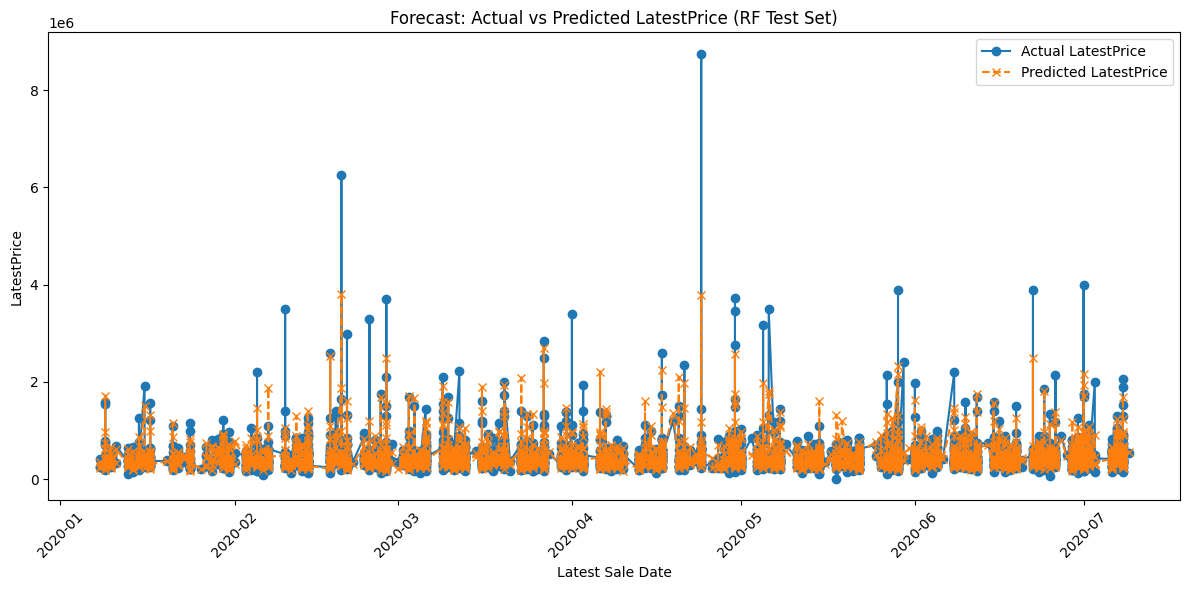

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(rf_test_dates, y_valid_rf, label='Actual LatestPrice', marker='o', linestyle='-')
plt.plot(rf_test_dates, y_pred, label='Predicted LatestPrice', marker='x', linestyle='--')
plt.xlabel('Latest Sale Date')
plt.ylabel('LatestPrice')
plt.title('Forecast: Actual vs Predicted LatestPrice (RF Test Set)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Tuned Model: Random Forest with Hyperparameter Optimization

## **Overview**
This model builds upon the **baseline Random Forest Regressor** by implementing **hyperparameter tuning** using `GridSearchCV`.  
It aims to **optimize performance** through a **systematic search** over multiple hyperparameter combinations.


## **Methodology**

### 1️.  **Data Preparation**
- Select numerical features, excluding irrelevant columns.
- Extract **local slopes** from the GWR model (`local_betas[:, 1:]`).
- Concatenate `X_rf` and `local_slopes` to construct `X_aug`.

### 2️. **Model Training & Hyperparameter Optimization**
- Define a **grid of hyperparameters**:
  - `n_estimators`: `[100, 200]`
  - `max_depth`: `[None, 10, 20, 30]`
  - `min_samples_split`: `[2, 5, 10]`
  - `min_samples_leaf`: `[1, 2, 4]`
  - `max_features`: `[ 'sqrt']`
- Perform **5-fold cross-validation** using `GridSearchCV`.
- Select the **best combination of hyperparameters**.

### 3️. **Model Evaluation**
- Train the **best estimator** from `GridSearchCV` on the training set.
- Compute **R²** and **RMSE** on the validation set.



In [ ]:
################################################### Random Forest with GWR : Best parameters #################################################
# MODEL 0 "USING local_betas"
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

#################################################################### UPDATE ########################################################################
''' X_ cannot be used now, since we dropped 'MORTGAGE30US','MEDLISPRIPERSQUFEE12420' from it.
     We removed from X_ 'latitude', 'longitude', 'MORTGAGE30US', 'MEDLISPRIPERSQUFEE12420', 'latest_saledate', 'parkingSpaces'. '''

## We use X_rf and not X_
X_rf = X_train.select_dtypes(include=['number']).drop(
    columns=['latitude', 'longitude', 'latest_saledate', 'parkingSpaces'],
    errors='ignore'
).values
print("X_rf shape:", X_rf.shape)

local_betas = gwr_model.params  # (n, p)
print("local_betas shape:", local_betas.shape)

# local_betas has shape (n, p). We typically drop the intercept:
local_slopes = local_betas[:, 1:]  # shape (n, p-1)

# RF input 1
X_aug = np.hstack([X_rf, local_slopes])
print("Augmented feature shape:", X_aug.shape)

# flatten y for ease
y_array = y_.ravel()  # (n,)

# Chronological train-test split: first 80% as training, last 20% as validation.
n_total = X_aug.shape[0]
n_train = int(0.8 * n_total)

X_train_aug = X_aug[:n_train]
y_train_rf = y_array[:n_train]
X_valid_aug = X_aug[n_train:]
y_valid_rf = y_array[n_train:]

# Set parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

rf = RandomForestRegressor(random_state=11, n_jobs=-1)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

# Run grid search on the training set
grid_search.fit(X_train_aug, y_train_rf)

# Retrieve the best estimator from grid search
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


# Evaluate the tuned model on the validation set
y_pred = best_rf.predict(X_valid_aug)
r2 = r2_score(y_valid_rf, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid_rf, y_pred))

print("Tuned Random Forest Performance:")
print(f"  R^2:  {r2:.3f}")
print(f"  RMSE: {rmse:,.3f}")

X_rf shape: (12016, 30)
local_betas shape: (12016, 29)
Augmented feature shape: (12016, 58)
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Performance:
  R^2:  0.707
  RMSE: 228,688.798


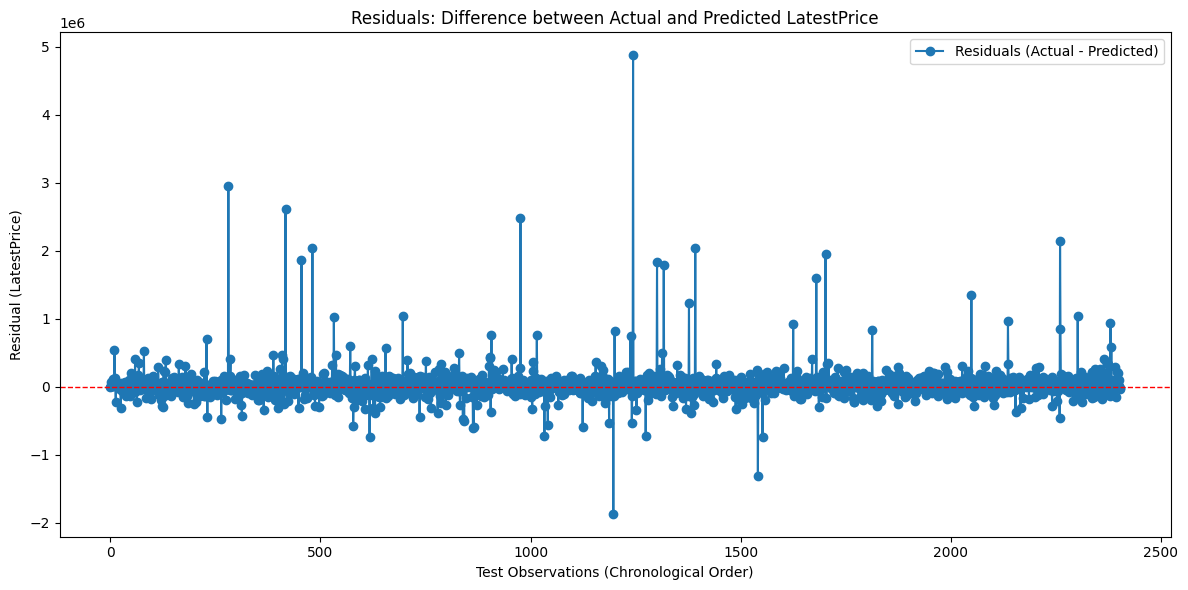

In [ ]:
# RESIDUAL PLOTS OF
import matplotlib.pyplot as plt
import numpy as np

# Calculate the residuals: difference between actual and predicted latestPrice.
residuals = y_valid_rf - y_pred

# Create an x-axis corresponding to the chronological order (the index within the test set)
x_axis = np.arange(len(residuals))

plt.figure(figsize=(12, 6))
plt.plot(x_axis, residuals, marker='o', linestyle='-', label='Residuals (Actual - Predicted)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # reference line at 0 error
plt.xlabel('Test Observations (Chronological Order)')
plt.ylabel('Residual (LatestPrice)')
plt.title('Residuals: Difference between Actual and Predicted LatestPrice')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Save the sale dates from the training set for later plotting
train_dates = train['latest_saledate'].values


In [ ]:
# Chronological split on the RF data (which comes from the training set)
n_rf_total = X_aug.shape[0]    # Should match len(train_dates)
n_rf_train = int(0.8 * n_rf_total)

X_train_aug = X_aug[:n_rf_train]
y_train_rf = y_array[:n_rf_train]
X_valid_aug = X_aug[n_rf_train:]
y_valid_rf = y_array[n_rf_train:]

# Get the corresponding sale dates for the RF test set from train_dates
rf_test_dates = train_dates[n_rf_train:]


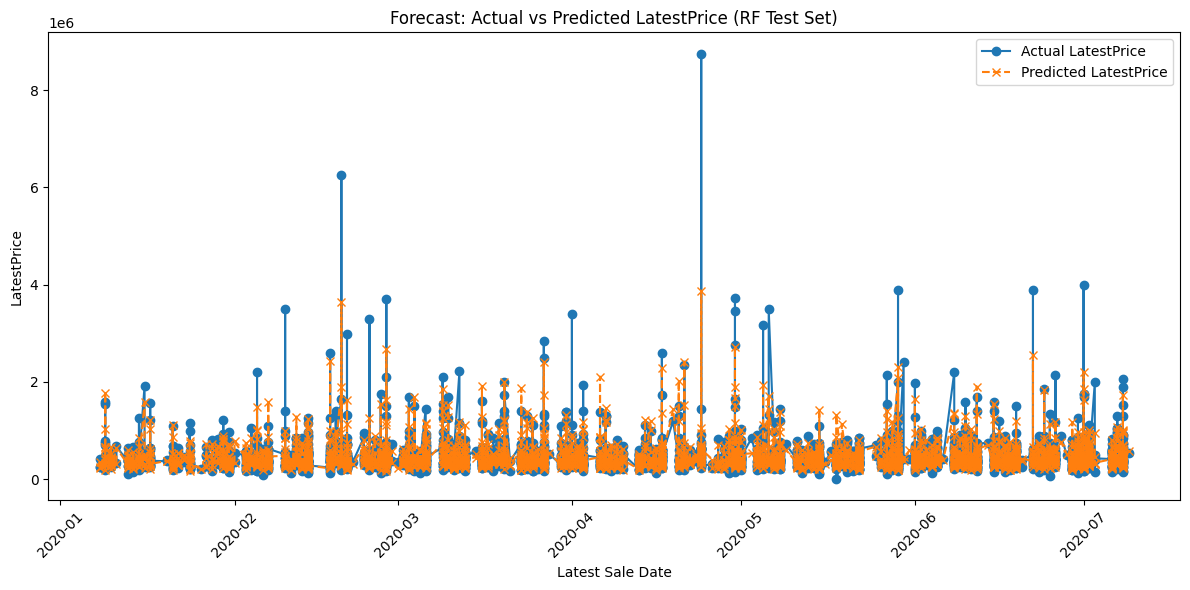

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(rf_test_dates, y_valid_rf, label='Actual LatestPrice', marker='o', linestyle='-')
plt.plot(rf_test_dates, y_pred, label='Predicted LatestPrice', marker='x', linestyle='--')
plt.xlabel('Latest Sale Date')
plt.ylabel('LatestPrice')
plt.title('Forecast: Actual vs Predicted LatestPrice (RF Test Set)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
######################################################### MODEL PERFORMANCE EVALUATION ########################################################################

# Predict on the training and validation sets using the correct variables.
y_train_pred = best_rf.predict(X_train_aug)
y_valid_pred = best_rf.predict(X_valid_aug)

# Compute R² scores.
train_r2 = r2_score(y_train_rf, y_train_pred)
valid_r2 = r2_score(y_valid_rf, y_valid_pred)

# Compute RMSE scores.
train_rmse = np.sqrt(mean_squared_error(y_train_rf, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid_rf, y_valid_pred))

# Print training metrics.
print("Training Metrics:")
print(f"  R²:   {train_r2:.3f}")
print(f"  RMSE: {train_rmse:,.3f}")

# Print validation metrics.
print("\nValidation Metrics:")
print(f"  R²:   {valid_r2:.3f}")
print(f"  RMSE: {valid_rmse:,.3f}")


Training Metrics:
  R²:   0.873
  RMSE: 162,098.279

Validation Metrics:
  R²:   0.707
  RMSE: 228,688.798


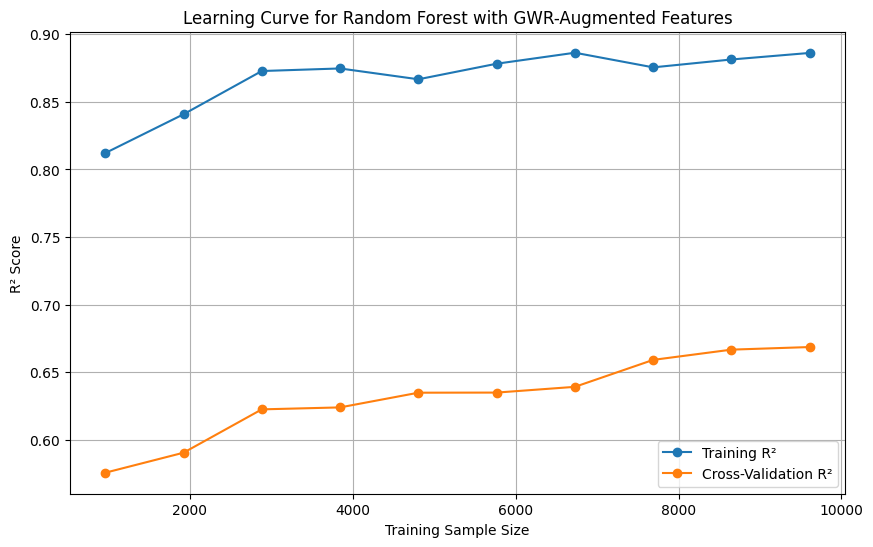

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# COMPUTE LEARNING CURVE
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=best_rf,
    X=X_aug,
    y=y_array.ravel(),
    cv=5,
    scoring='r2',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Calculate the mean scores across the folds
mean_train_scores = np.mean(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, mean_train_scores, 'o-', label='Training R²')
plt.plot(train_sizes, mean_valid_scores, 'o-', label='Cross-Validation R²')
plt.xlabel('Training Sample Size')
plt.ylabel('R² Score')
plt.title('Learning Curve for Random Forest with GWR-Augmented Features')
plt.legend()
plt.grid(True)
plt.show()
